<a href="https://colab.research.google.com/github/rkmaccha/NLP_Workbook/blob/main/NLP_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TEXT REPRESENTATION

### BAG OF WORDS

In [2]:
# import libraries
import pandas as pd
import numpy as np

In [3]:
# Bag of Words
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

In [4]:
# creating a dummy data:
df= pd.DataFrame({'text':['audience watch ram4uni','ram4uni watch ram4uni','audience write comments','ram4uni write comments'],'output':[1,1,0,0] })

In [5]:
df

,text,output
0,audience watch ram4uni,1
1,ram4uni watch ram4uni,1
2,audience write comments,0
3,ram4uni write comments,0


In [6]:
bow = cv.fit_transform(df['text'])

In [7]:
bow

<4x5 sparse matrix of type '<class 'numpy.int64'>'
	with 11 stored elements in Compressed Sparse Row format>

In [8]:
cv.vocabulary_

{'audience': 0, 'comments': 1, 'ram4uni': 2, 'watch': 3, 'write': 4}

In [9]:
print(bow[0].toarray())

[[1 0 1 1 0]]


In [10]:
print(bow[2].toarray())

[[1 1 0 0 1]]


In [13]:
cv.transform(['ram4uni watch and write comments on ram4uni'])

<1x5 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [14]:
cv.transform(['ram4uni watch and write comments on ram4uni']).toarray()

array([[0, 1, 2, 1, 1]])

### NGRAM ( BAG OF WORDS )

In [15]:
# Bag of Words using ngram
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(2,2))

In [16]:
bow = cv.fit_transform(df['text'])

In [17]:
cv.vocabulary_

{'audience watch': 0,
 'audience write': 1,
 'ram4uni watch': 2,
 'ram4uni write': 3,
 'watch ram4uni': 4,
 'write comments': 5}

In [18]:
print(bow[0].toarray())

[[1 0 0 0 1 0]]


In [19]:
print(bow[2].toarray())

[[0 1 0 0 0 1]]


In [20]:
cv.transform(['ram4uni watch and write comments on ram4uni']).toarray()

array([[0, 0, 1, 0, 0, 1]])

### TF_IDF (Term Frequency–Inverse Document Frequency)
documentation link : https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html

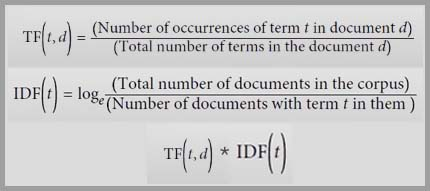

In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [22]:
tdidf = TfidfVectorizer()

In [23]:
tdidf.fit_transform(df['text']).toarray()

array([[0.61366674, 0.        , 0.49681612, 0.61366674, 0.        ],
       [0.        , 0.        , 0.8508161 , 0.52546357, 0.        ],
       [0.57735027, 0.57735027, 0.        , 0.        , 0.57735027],
       [0.        , 0.61366674, 0.49681612, 0.        , 0.61366674]])

In [26]:
print(tdidf.idf_)
print(tdidf.get_feature_names_out())

[1.51082562 1.51082562 1.22314355 1.51082562 1.51082562]
['audience' 'comments' 'ram4uni' 'watch' 'write']
